In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
#Loading Data

dataset = fetch_california_housing()

In [9]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Vanilla Model

In [12]:

x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

# Preporocessing
scaler=StandardScaler()
x=scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
     
#Model Dev

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Evaluaion
mse_error = mean_squared_error(y_test, y_pred)
r2_s = r2_score(y_test, y_pred)
print("R2_Score: ",r2_s)
print("Mean_Sqaure_Error: ",mse_error)

R2_Score:  0.603871480268971
Mean_Sqaure_Error:  0.5351889662653285


### Filter Based --> Using SelectKBest

In [13]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

In [14]:
x.shape

(20640, 8)

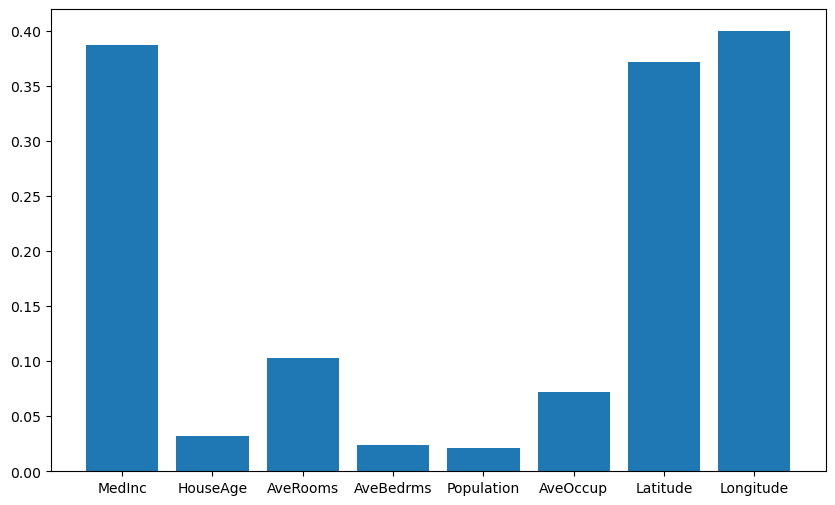

In [15]:
mi = mutual_info_regression(x, y)

# Visualise Feature Selection
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi)
plt.show()

In [34]:
#Implementing SelectKBest

x_new = SelectKBest(mutual_info_regression, k=5).fit_transform(x, y)
print(x_new.shape)

(20640, 5)


In [35]:
# Train and Test Data Split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

#Model Dev
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


#Evaluaion
mse_error_selectk = mean_squared_error(y_test, y_pred)
r2_s_selectk = r2_score(y_test, y_pred)
print("R2_Score: ",r2_s_selectk)
print("Mean_Sqaure_Error: ",mse_error_selectk)

R2_Score:  0.5891593510680287
Mean_Sqaure_Error:  0.5625453778285613


# # Wrapper Base --> RFE

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(x, y)
print(selector.ranking_, )

[4 3 2 1 1 1 1 1]


In [29]:
x_new = selector.transform(x)
print(x_new.shape)

(20640, 5)


In [30]:
#train & test
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

#model dev
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#evaluation
mse_error_rfe = mean_squared_error(y_test, y_pred)
r2_s_rfe = r2_score(y_test, y_pred)
print("R2_Score: ",r2_s_rfe)
print("Mean_Sqaure_Error: ",mse_error_rfe)


R2_Score:  0.24461550696203305
Mean_Sqaure_Error:  0.9594610607671065


# #Principal component analysis (PCA)

In [31]:
from sklearn.decomposition import PCA
print(x.shape)
x_new = PCA(n_components=4, svd_solver='full').fit_transform(x)
print(x_new.shape)

(20640, 8)
(20640, 4)


In [33]:
#train & test
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

#Model Dev
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Evaluation
mse_error_pca = mean_squared_error(y_test, y_pred)
r2_s_pca = r2_score(y_test, y_pred)
print("R2_Score: ",r2_s_pca)
print("Mean_Sqaure_Error: ",mse_error_pca)

R2_Score:  0.45403369715306907
Mean_Sqaure_Error:  0.6974436907806547
